In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from collections import OrderedDict
from jupyterthemes import jtplot
jtplot.style(theme='grade3',ticks=True, grid=True, figsize=(12, 7),context='poster',fscale=1.5, spines=True, gridlines='--')
%matplotlib inline

In [24]:
def DataPro(data):
    lines=data.splitlines()
    TimeList=[float(lines[i].split()[0]) for i in range(len(lines)-1)][:]
    DataList=[float(lines[i].split()[1]) for i in range(len(lines)-1)][:]
    return TimeList,DataList

def DataStatis(results):
    statislist=OrderedDict()
    for name,result in results.items():
        result=DataPro(result)
        TimeList,DataList=np.array(result[0]),np.array(result[1])
        Mean=np.mean(DataList)
        Std=np.std(DataList)
        PpV=np.amax(DataList)-np.amin(DataList)
        print("file'%s'"%name)
        print('Mean value is ',Mean)
        print('STD value is ',Std)
        print('Peak-Peak value is ',PpV)
        print('Noise-to-Signal ratio is ',Std/Mean*(10**6),' ppm\n')
        statislist[name]=[Mean,Std,PpV]
    return statislist

def ShowData(results,sf=False,filename='outputdata.pdf',color=["red","blue"]):  
    plt.figure(figsize=(14,8))
    plt.rc("font", family="serif",size=25)
    #plt.ylim(9.61075,9.612)
    plt.xlim(0,)
#     plt.title('Data')
    plt.xlabel('time/s')
    plt.ylabel('Current/mA')
    plt.grid(True)
    s=["Current After Lock","Direct Output from Agilent 6682A"]
    i=-1
    for name,result in results.items():
        i+=1
        lab=s.pop()
        result=DataPro(result)
        TimeList,DataList=np.array(result[0]),10000*np.array(result[1])
        plt.plot(TimeList,DataList-np.mean(DataList),linewidth=2,color=color[i],label=lab)
        plt.legend()
    if sf==True:
        plt.savefig(filename,bbox_inches="tight")
    
    
def FileChosen(folder):
    FilesPre=os.listdir(folder)
    Files=[]
    for filename in FilesPre:
        if os.path.splitext(filename)[1]=='.xls':
            Files.append(filename)
    datalist=OrderedDict()
    FileList=[os.path.join(folder,Files[i]) for i in range(len(Files))]
    for i,name in enumerate(FileList):
        print(str(i)+'. '+name)
    try:
        print('Which files do you want to choose?(enter n to end)\n')
        while True:
            ChosenFile=input()
            if ChosenFile=='n':
                print('End!')
                break
            elif ChosenFile=='all':
                print('You select all files!!Processing....')
                for i in range(len(FileList)):
                    with open(FileList[i]) as f:
                        data=f.read()
                    datalist[Files[i]]=data
                break
            elif (int(ChosenFile)<0) or (int(ChosenFile)>(len(Files)-1)):
                print('Out of Range,Pls input legal number.')
            else:
                ChosenFile=int(ChosenFile)
                with open(FileList[ChosenFile]) as f:
                    data=f.read()
                datalist[Files[ChosenFile]]=data
    except:
        print('Wrong Input!!Please restart again.')
    finally:
        pass
    return datalist

def FFTShow(results,xm=5000,sf=False,filename='outputdata.pdf',color=["red","blue"]):
    plt.figure(figsize=(14,8))
    plt.rc("font", family="serif",size=25)
    plt.ylim(-160,-80)
    plt.xlabel('Freq/Hz')
    plt.ylabel('RIN/(dB/Hz)')
    plt.grid(True)
#     plt.title('FFT Result')
    s=["Current After Lock","Direct Output from Agilent 6682A"]
    i=-1
    for name,result in results.items():
        i+=1
        lab=s.pop()
        result=DataPro(result)
        TimeList,DataList=np.array(result[0]),np.array(result[1])
        grossfft=20*np.log10(2*abs(np.fft.rfft(DataList))/len(DataList))
        grossfft[0]=grossfft[0]-20*np.log10(2)
        #print(grossfft)
        fftresult=grossfft-np.amax(grossfft)
        #print(len(fftresult))
        frerange=np.linspace(0,0.5/(TimeList[2]-TimeList[1]),len(fftresult))
#         if xm>0.5/(TimeList[2]-TimeList[1]):
#             plt.xlim(0,0.5/(TimeList[2]-TimeList[1]))
#         else:
#             plt.xlim(0,xm)
# #             plt.semilogx
        plt.xlim(1,5000)    
        plt.semilogx(frerange,fftresult,linewidth=2,label=lab,color=color[i])
        plt.legend()
    if sf==True:
        plt.savefig(filename,bbox_inches="tight")

## Choose file

In [3]:
# data1=FileChosen('FFTdata/20180326/')
# data2=FileChosen('FFTdata/Comp/worse/')
data3=FileChosen('FFTdata/Comp/better/')
# data4=FileChosen('FFTdata/Comp/worse/')

0. FFTdata/Comp/better/AdjustBetter.xls
1. FFTdata/Comp/better/AgilentFreeRun.xls
2. FFTdata/Comp/better/OP177.xls
3. FFTdata/Comp/better/20180206adjust.xls
4. FFTdata/Comp/better/20180206adjust2.xls
5. FFTdata/Comp/better/LevitMag_IGBTPIAdj_2018-02-05-15-17-18.xls
6. FFTdata/Comp/better/Old-OP177WithOutCap.xls
7. FFTdata/Comp/better/OP177WithCapFinal.xls
8. FFTdata/Comp/better/AD8597WithCap.xls
Which files do you want to choose?(enter n to end)

1
7
n
End!


In [4]:
#print(data1)
for key in data3.keys():
    print(key)

# for key in data2.keys():
#     print(key)

AgilentFreeRun.xls
OP177WithCapFinal.xls


## Data Statistic

In [5]:
#print('result1:')
_=DataStatis(data3)
#print('result2:')
# _=DataStatis(data2)
# _=DataStatis(data3)
# _=DataStatis(data4)

file'AgilentFreeRun.xls'
Mean value is  9.316721288812882
STD value is  0.0005148205873829162
Peak-Peak value is  0.003144439999999804
Noise-to-Signal ratio is  55.25769972330187  ppm

file'OP177WithCapFinal.xls'
Mean value is  9.53832877727073
STD value is  6.028269652270247e-05
Peak-Peak value is  0.0004552499999999071
Noise-to-Signal ratio is  6.320048084980311  ppm



## Show Data

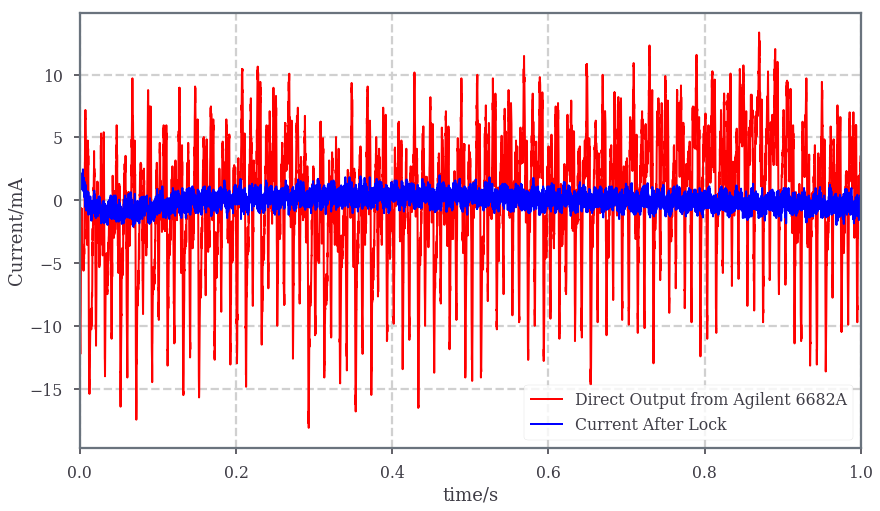

In [17]:
savefig=True #选择是否保存文件
filename1='dataresult.pdf'
#filename2='data2.pdf'
ShowData(data3,sf=savefig,filename=filename1)
# ShowData(data2,sf=savefig,filename=filename2)
# ShowData(data3,sf=savefig,filename=filename1)
# ShowData(data4,sf=savefig,filename=filename2)

## Show FFT Results

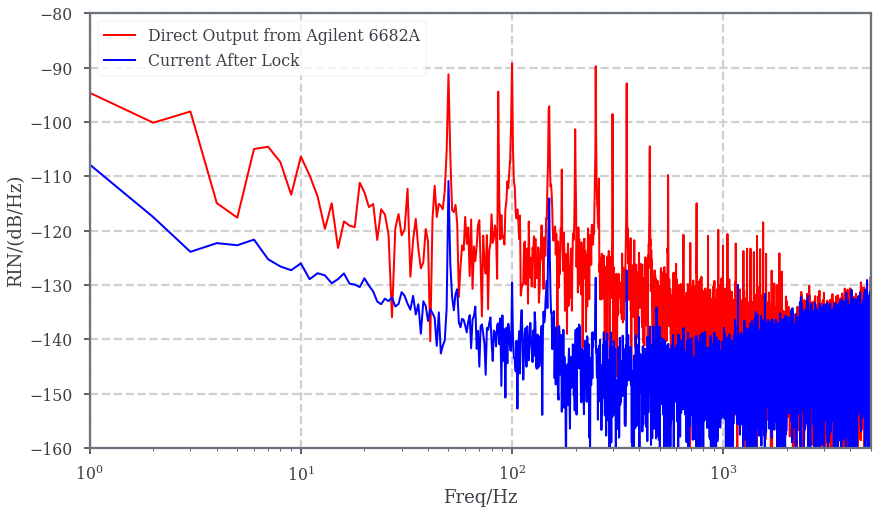

In [25]:
savefig=True #选择是否保存文件
filename1='FFTdata.pdf'
# filename2='AfternoonWorseComp5kHz.pdf'
FFTShow(data3,5000,sf=savefig,filename=filename1)
# FFTShow(data2,5000,sf=savefig,filename=filename2)
# FFTShow(data3,5000,sf=savefig,filename=filename1)
# FFTShow(data4,5000,sf=savefig,filename=filename2)

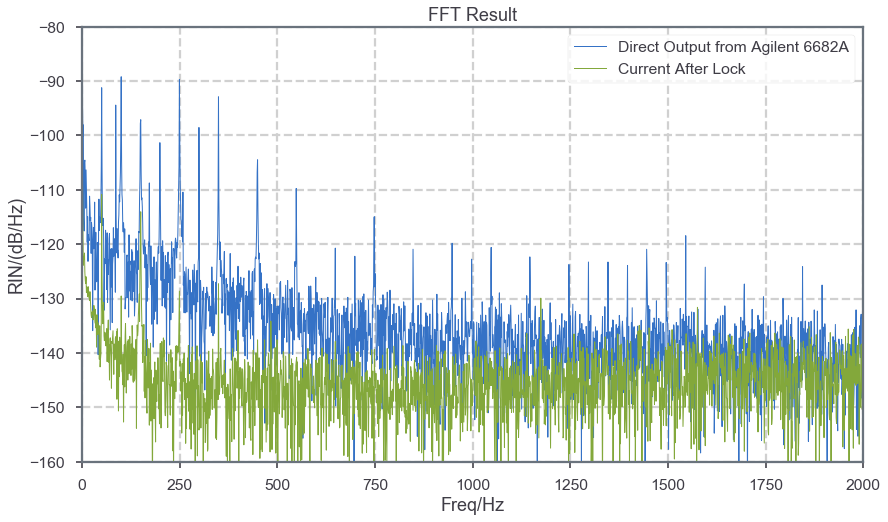

In [26]:
savefig=False #选择是否保存文件
filename1='20180207OpCom2kHz.pdf'
filename2='AfternoonWorseComp2kHz.pdf'
FFTShow(data3,2000,sf=savefig,filename=filename1)
# FFTShow(data2,2000,sf=savefig,filename=filename2)
# FFTShow(data3,2000,sf=savefig,filename=filename1)
# FFTShow(data4,2000,sf=savefig,filename=filename2)

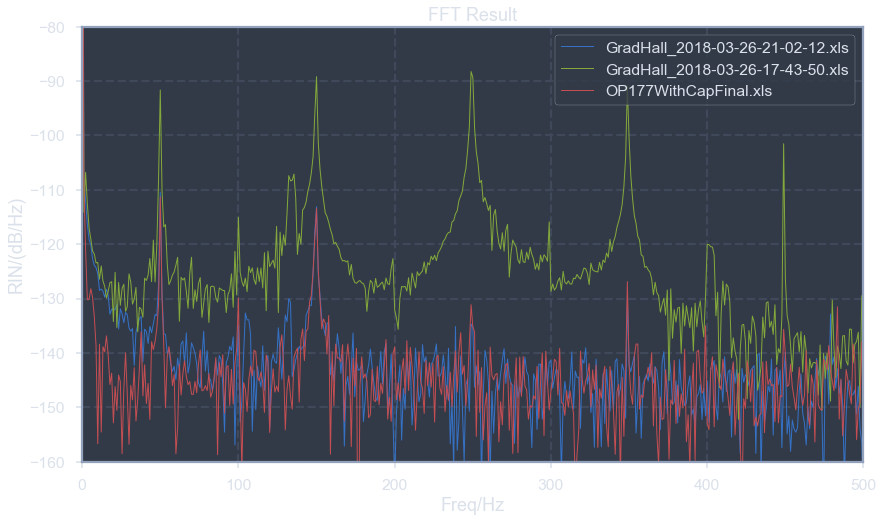

In [40]:
savefig=False #选择是否保存文件
filename1='20180207OpCom500Hz.pdf'
filename2='WorseComp500Hz.pdf'
FFTShow(data1,500,sf=savefig,filename=filename1)
# FFTShow(data2,500,sf=savefig,filename=filename2)
# FFTShow(data3,500,sf=savefig,filename=filename1)
# FFTShow(data4,500,sf=savefig,filename=filename2)

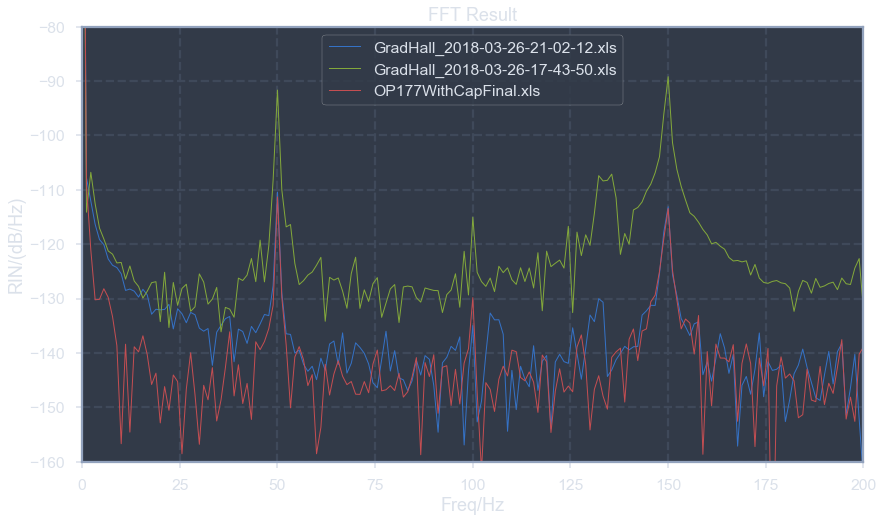

In [41]:
savefig=False #选择是否保存文件
filename1='20180207OpCom200Hz.pdf'
filename2='WorseComp200Hz.pdf'
FFTShow(data1,200,sf=savefig,filename=filename1)
# FFTShow(data2,200,sf=savefig,filename=filename2)
# FFTShow(data3,200,sf=savefig,filename=filename1)
# FFTShow(data4,200,sf=savefig,filename=filename2)

0. FFTdata/Comp/20180207OP177/IGBTNewMod_Test_2018-02-07-11-55-22.xls
1. FFTdata/Comp/20180207OP177/IGBTNewMod_Test_2018-02-07-11-54-56.xls
2. FFTdata/Comp/20180207OP177/IGBTNewMod_Test_2018-02-07-11-54-43.xls
3. FFTdata/Comp/20180207OP177/IGBTNewMod_Test_2018-02-07-11-56-26.xls
4. FFTdata/Comp/20180207OP177/IGBTNewMod_Test_2018-02-07-11-54-30.xls
Which files do you want to choose?(enter n to end)

all
You select all files!!Processing....


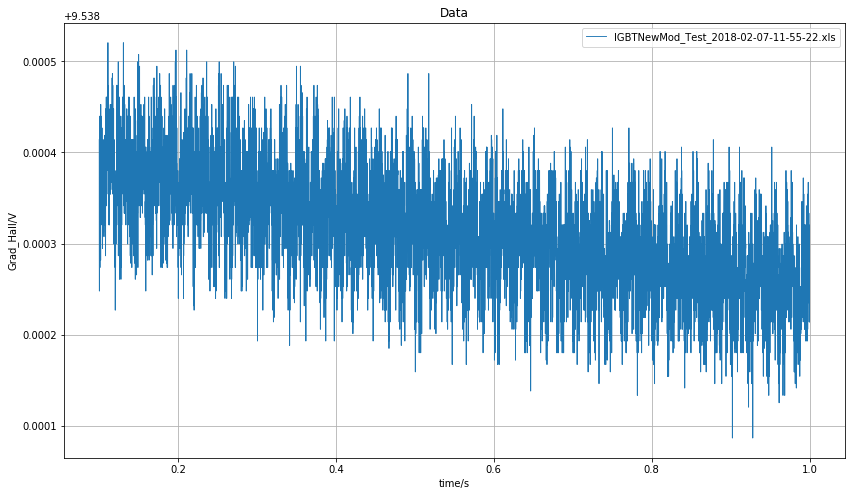

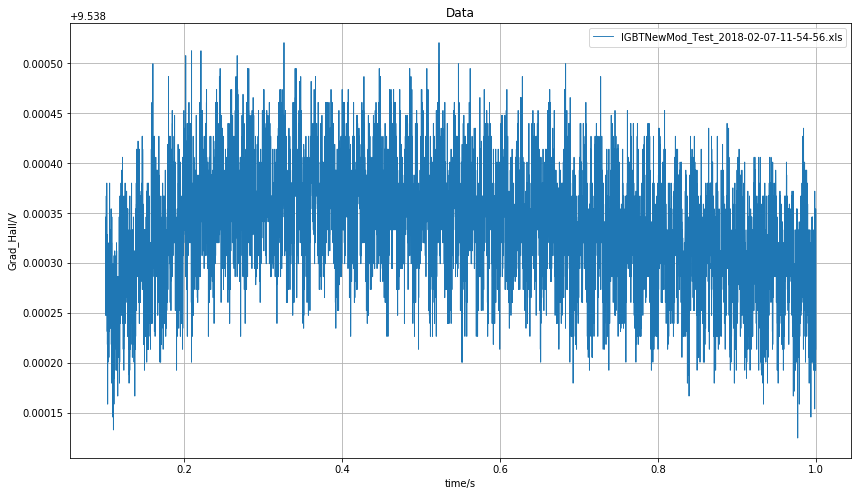

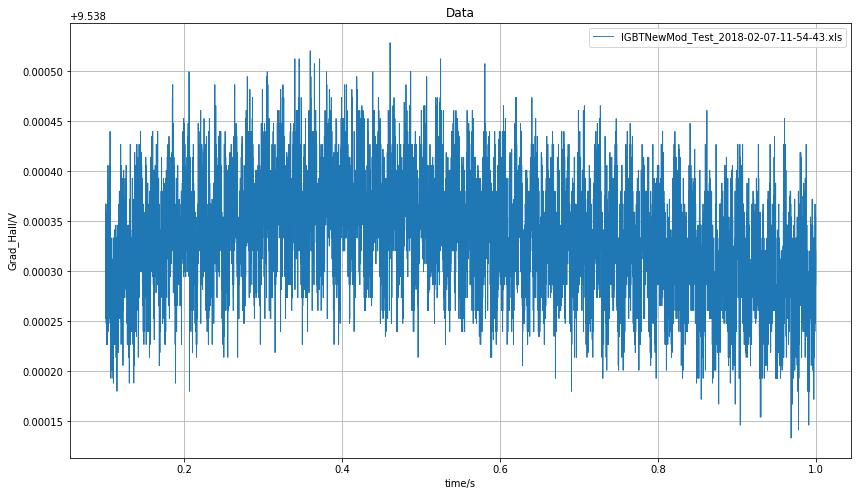

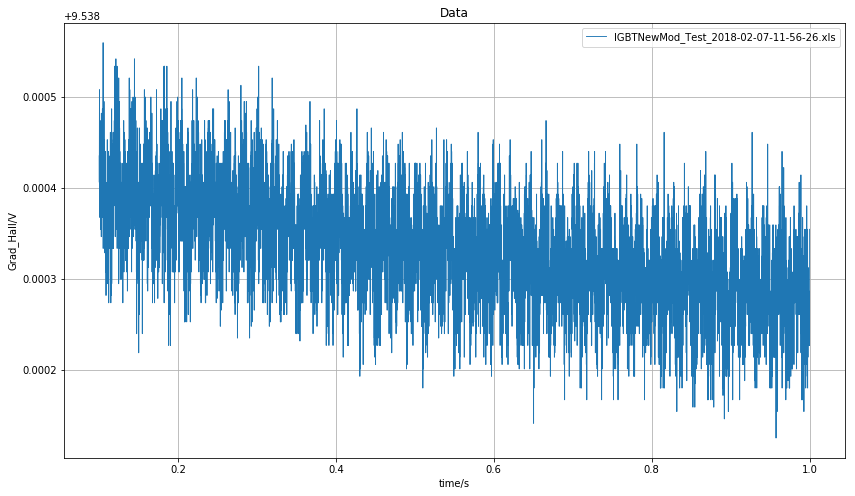

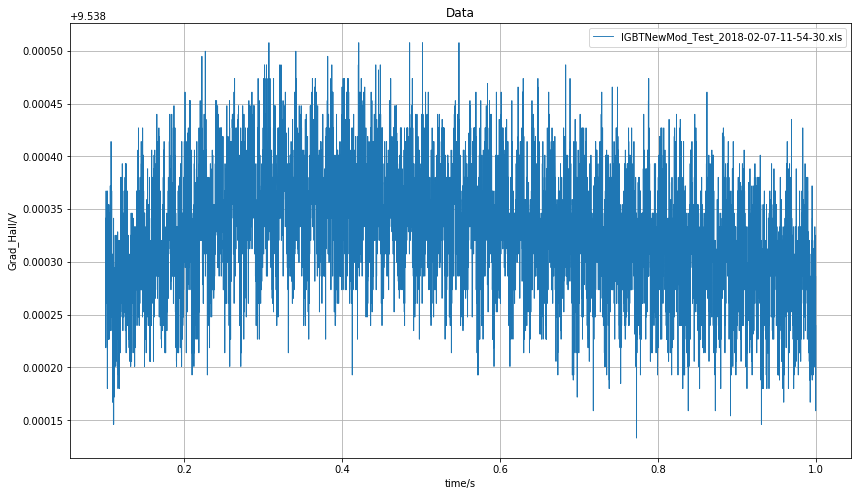

In [14]:
results=FileChosen('FFTdata/Comp/20180207OP177/')
for name,result in results.items():
        result=DataPro(result)
        TimeList,DataList=np.array(result[0]),np.array(result[1])
        plt.figure(figsize=(14,8))
        #plt.ylim(9.61075,9.612)
        #plt.xlim(TimeList[0],TimeList[-1])
        plt.title('Data')
        plt.xlabel('time/s')
        plt.ylabel('Grad_Hall/V')
        plt.grid(True)
        plt.plot(TimeList,DataList,linewidth=0.9,label=name)
        plt.legend()